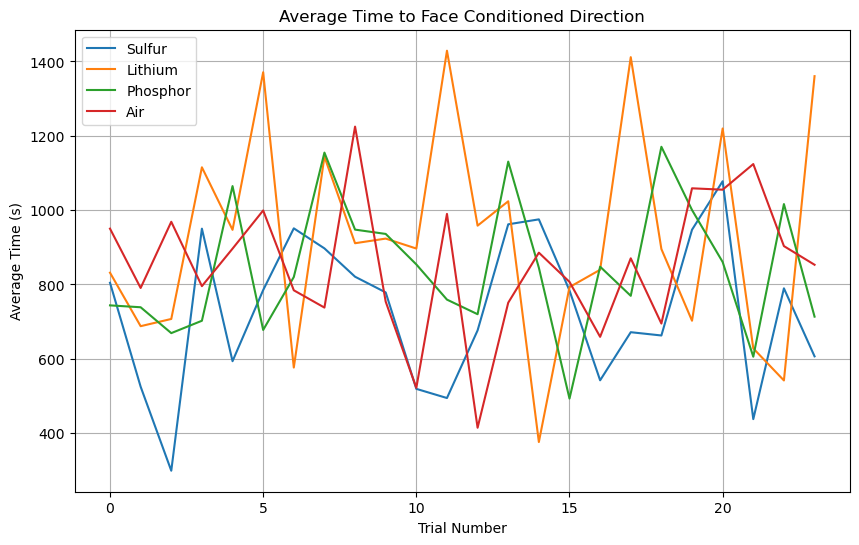

In [2]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# Define the filepaths
input_file = "/media/alexmatthews/Alex_011/ZOOL412/rotational_data_processed (1).json"
output_folder = "/media/alexmatthews/Alex_011/ZOOL412/graphs"

# Load the JSON file
with open(input_file, 'r') as json_file:
    data = json.load(json_file)

# Initialize a dictionary to store the average times for each group
group_data = {
    "Sulfur": {},
    "Lithium": {},
    "Phosphor": {},
    "Air": {}
}

# Process the data
for animal_id, trials in data.items():
    for trial_number_str, trial_data in trials.items():
        trial_number = int(trial_number_str)  # Convert trial_number to an integer
        conditioned_stimulus = trial_data["learning_odour"]
        start_time = trial_data["start_time"]
        
        if conditioned_stimulus not in group_data:
            continue
        
        if trial_number not in group_data[conditioned_stimulus]:
            group_data[conditioned_stimulus][trial_number] = []
        
        group_data[conditioned_stimulus][trial_number].append(start_time)

# Calculate the average times for each group
average_times = {
    "Sulfur": [],
    "Lithium": [],
    "Phosphor": [],
    "Air": []
}

max_trials = max([max(map(int, trials.keys())) for trials in data.values()])

for group, trials in group_data.items():
    for trial_number in range(max_trials + 1):
        if trial_number in trials:
            average_time = np.nanmean(trials[trial_number])
        else:
            average_time = np.nan
        
        average_times[group].append(average_time)

# Create the graphs
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

plt.figure(figsize=(10, 6))

for group, times in average_times.items():
    plt.plot(range(len(times)), times, label=group)

plt.xlabel('Trial Number')
plt.ylabel('Average Time (s)')
plt.title('Average Time to Face Conditioned Direction')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(output_folder, 'average_time_to_face_conditioned_direction.png'))
plt.show()
